In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
import tensorflow as tf

In [2]:
beijing_pm = '../data/beijing_pm25.csv'
bike_hour = '../data/bike_hour.csv'
solar_energy = '../data/solar_energy_1.csv'
nsw2013 = '../data/NSW2013.csv'
nsw2016 = '../data/NSW2016.csv'


In [3]:
file_paths = os.listdir('../data')

In [4]:
file_paths

['TAS2016.csv',
 'bike_hour.csv',
 'pollution.csv',
 'NSW2016.csv',
 'NSW2013.csv',
 'solar_energy_1.csv',
 'beijing_pm25.csv',
 'traffic_data_in_bits.csv']

In [8]:
df_list = [pd.read_csv('../data/'+file_path) for file_path in file_paths]

In [9]:
df_TAS2016, df_bike_hour, df_pollution, df_NSW2016, df_NSW2013, df_solar_energy, df_beijingpm, df_traffic = df_list

In [10]:
def ts_1dim(series, idx_start, idx_end, n_after, title, fname=False):
    
    fig, ax = plt.subplots()
    ls = len(series[idx_start:idx_end])
    ax.plot(list(range(1, ls+1)), series[idx_start:idx_end].values, 'b-')
    ax.plot(list(range(ls, ls+n_after+1)), series[idx_end-1: idx_end+n_after], 'r:')
#     ax.scatter(list(range(ls+1, ls+n_after+1)), series[idx_end: idx_end+n_after], color='red')
#     ax.set_xticks(list(range(1, ls+2)))
    ax.set_title(title)
    if fname:
        fig.savefig('./save/'+title+'.pdf', format='pdf')
    plt.close()
    return fig

In [11]:
for file, df in zip(file_paths, df_list):
    print(file)
    print(df.dtypes)
    print(df.head())
    print()

TAS2016.csv
REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object
  REGION SETTLEMENTDATE  TOTALDEMAND     RRP PERIODTYPE
0   TAS1  2016/1/1 0:30      1034.88   98.52      TRADE
1   TAS1  2016/1/1 1:00      1035.77   99.25      TRADE
2   TAS1  2016/1/1 1:30       998.99   96.90      TRADE
3   TAS1  2016/1/1 2:00       974.48   99.37      TRADE
4   TAS1  2016/1/1 2:30       995.02  100.34      TRADE

bike_hour.csv
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01     

<AxesSubplot:>

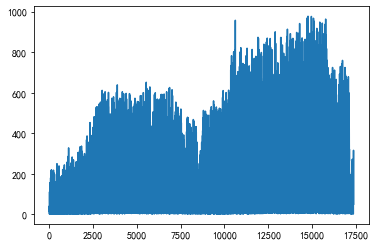

In [13]:
df_bike_hour.cnt.plot()

In [35]:
df_raw = pd.read_csv('../data/bike_hour.csv', index_col=0)

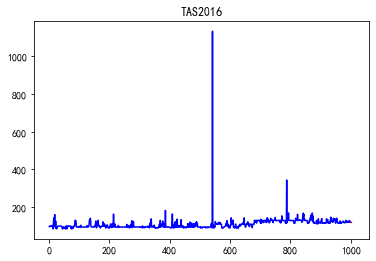

In [16]:
ts_1dim(df_TAS2016.RRP, 0, 1000, 10, 'TAS2016')

In [47]:
df_raw.weathersit.unique()

array([1, 2, 3, 4])

In [38]:
df_raw

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


In [32]:
df_bike_hour.hum.count()

17379

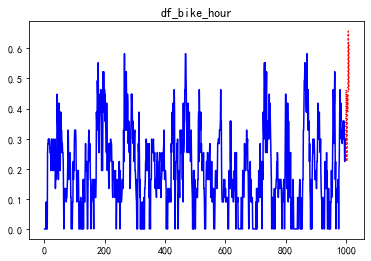

In [31]:
ts_1dim(df_bike_hour.windspeed, 0, 1000, 10, 'df_bike_hour')

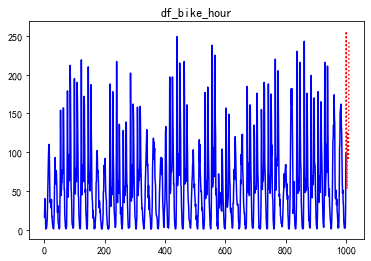

In [33]:
ts_1dim(df_bike_hour.cnt, 0, 1000, 10, 'df_bike_hour')

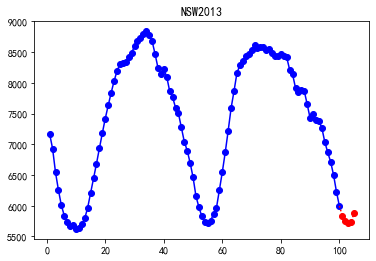

In [72]:
ts_1dim(df_NSW2013.TOTALDEMAND, 0, 100, 5, 'NSW2013')

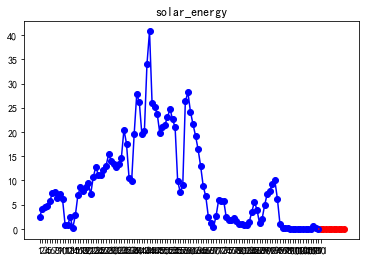

In [41]:
ts_1dim(df_solar_energy['Power(MW)'], 90, 200, 10, 'solar_energy')

In [48]:
import json

In [49]:
with open('../experiments/config.json', 'r') as conf:
    config = json.load(conf)

In [51]:
config.items()

dict_items([('bike_hour', {'sparse_col': {'season': 0, 'holiday': 0, 'workingday': 5, 'weathersit': 0}, 'dense_col': ['weekday', 'yr', 'mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registed']})])

In [52]:
config['bike_hour']

{'sparse_col': {'season': 0, 'holiday': 0, 'workingday': 5, 'weathersit': 0},
 'dense_col': ['weekday',
  'yr',
  'mnth',
  'hr',
  'temp',
  'atemp',
  'hum',
  'windspeed',
  'casual',
  'registed']}

In [63]:
tf.one_hot([1,2,3], 3)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

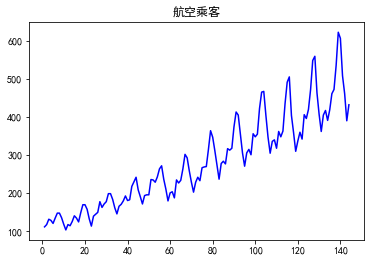

In [26]:
ts_1dim(airpassenger_df.Passengers, 0, airpassenger_df.shape[0], 0, '航空公司乘客')

In [23]:
import datetime
import numpy as np

In [25]:
ts = {
    'a': [1,2,3],
    'b': [2,3]
}

In [64]:
np.save('temp.npy', ts)

In [65]:
ts_load = np.load('temp.npy', allow_pickle=True)

In [81]:
arr = list(range(10))

In [83]:
np.save('arr.npy', arr)

In [84]:
arr_load = np.load('arr.npy', allow_pickle=True)

In [87]:
arr_load[1]

1

In [88]:
import pickle

In [90]:
pickle.dump(ts, 'ts.pkl')

TypeError: file must have a 'write' attribute

In [106]:
import os
import matplotlib.pyplot as plt

In [98]:
os.getcwd()

'/home/haohy/TSF/deepts/notebooks'

In [100]:
with open('../examples/results/2021-02-20 09:20:15.614663.pkl', 'rb') as f:
    testset = pickle.load(f)

In [110]:
testset['y_pred'][0]

array([39.188953, 39.63295 , 40.290417, 39.28692 , 42.715416, 38.38282 ,
       38.198418, 39.37887 , 39.00522 , 39.32352 , 39.131714, 37.517475,
       39.189014, 41.09451 , 39.45034 , 37.700565, 39.109688, 36.673203,
       39.990677, 38.701233, 36.31    , 39.151684, 38.840954, 39.469505],
      dtype=float32)

In [132]:
testset['x_test'][0][:, -7]

<tf.Tensor: shape=(168,), dtype=float32, numpy=
array([  7.,   4.,  49., 185., 487., 681., 350., 236., 234., 284., 280.,
       263., 295., 479., 837., 891., 652., 513., 320., 288., 152.,  63.,
        42.,  11.,   6.,   9.,  41., 183., 473., 739., 343., 181., 226.,
       286., 310., 225., 270., 406., 865., 767., 607., 427., 342., 262.,
       177.,  71.,  43.,  14.,   6.,  12.,  37., 163., 421., 668., 396.,
       249., 263., 338., 345., 331., 380., 492., 741., 671., 469., 389.,
       278., 202., 196., 161., 122.,  84.,  30.,  13.,  17.,  49.,  67.,
       181., 278., 396., 470., 547., 527., 472., 489., 450., 492., 490.,
       397., 312., 289., 269., 222., 153.,  87.,  73.,  41.,  14.,  19.,
        19.,  68., 108., 229., 364., 437., 491., 523., 526., 450., 421.,
       382., 229., 185., 193., 208., 157.,  87.,  33.,  11.,   5.,   5.,
        11.,  25., 141., 407., 605., 276., 213., 260., 285., 289., 287.,
       274., 451., 858., 843., 640., 457., 317., 207., 113.,  47.,  18.,
   

In [133]:
testset['x_test'][0][:, -1]

<tf.Tensor: shape=(168,), dtype=float32, numpy=
array([352., 257., 147.,  47.,  33.,  13.,   7.,   4.,  49., 185., 487.,
       681., 350., 236., 234., 284., 280., 263., 295., 479., 837., 891.,
       652., 513., 320., 288., 152.,  63.,  42.,  11.,   6.,   9.,  41.,
       183., 473., 739., 343., 181., 226., 286., 310., 225., 270., 406.,
       865., 767., 607., 427., 342., 262., 177.,  71.,  43.,  14.,   6.,
        12.,  37., 163., 421., 668., 396., 249., 263., 338., 345., 331.,
       380., 492., 741., 671., 469., 389., 278., 202., 196., 161., 122.,
        84.,  30.,  13.,  17.,  49.,  67., 181., 278., 396., 470., 547.,
       527., 472., 489., 450., 492., 490., 397., 312., 289., 269., 222.,
       153.,  87.,  73.,  41.,  14.,  19.,  19.,  68., 108., 229., 364.,
       437., 491., 523., 526., 450., 421., 382., 229., 185., 193., 208.,
       157.,  87.,  33.,  11.,   5.,   5.,  11.,  25., 141., 407., 605.,
       276., 213., 260., 285., 289., 287., 274., 451., 858., 843., 640.,
   

In [123]:
testset['y_true'][-1]

<tf.Tensor: shape=(24,), dtype=float32, numpy=
array([ 34.,  19.,  11.,   1.,   3.,   9.,  40.,  85., 196., 157., 120.,
       157., 224., 203., 247., 315., 214., 164., 122., 119.,  89.,  90.,
        61.,  49.], dtype=float32)>

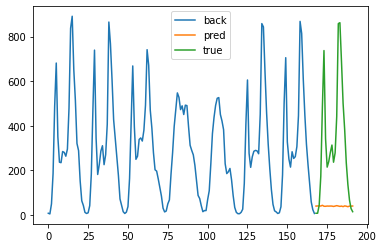

In [136]:
fig, axs= plt.subplots(1, 1)
x_back = list(range(len(testset['x_test'][0])))
x_fore = list(range(len(testset['x_test'][0]), len(testset['x_test'][0])+len(testset['y_pred'][0])))
axs.plot(x_back, testset['x_test'][0][:, -7], label='back')
axs.plot(x_fore, testset['y_pred'][0], label='pred')
axs.plot(x_fore, testset['y_true'][0], label='true')
axs.legend()
plt.savefig('temp.png', format='png')
plt.close()
fig

In [67]:
np.savez('savez.npz', ts)

In [68]:
savez = np.load('savez.npz', allow_pickle=True)

In [79]:
savez['arr_0']

array({'a': [1, 2, 3], 'b': [2, 3]}, dtype=object)

In [75]:
type(savez['arr_0'])

numpy.ndarray

In [40]:
ts_load

array({'a': [1, 2, 3], 'b': [2, 3]}, dtype=object)

In [37]:
type(ts_load)

numpy.ndarray

In [20]:
str(datetime.datetime.now())

'2021-02-20 08:33:11.302871'

In [150]:
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [119]:
dateparse = lambda date: datetime.strptime(date, '%Y-%m')
airpassenger_df = pd.read_csv('../data/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

In [120]:
ts = airpassenger_df['#Passengers']

In [156]:
# decomposition = seasonal_decompose(ts, model="additive")
decomposition = STL(ts).fit()
# decomposition.plot()
# plt.show()
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/_backend_pdf_ps.py:102: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/haohy/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


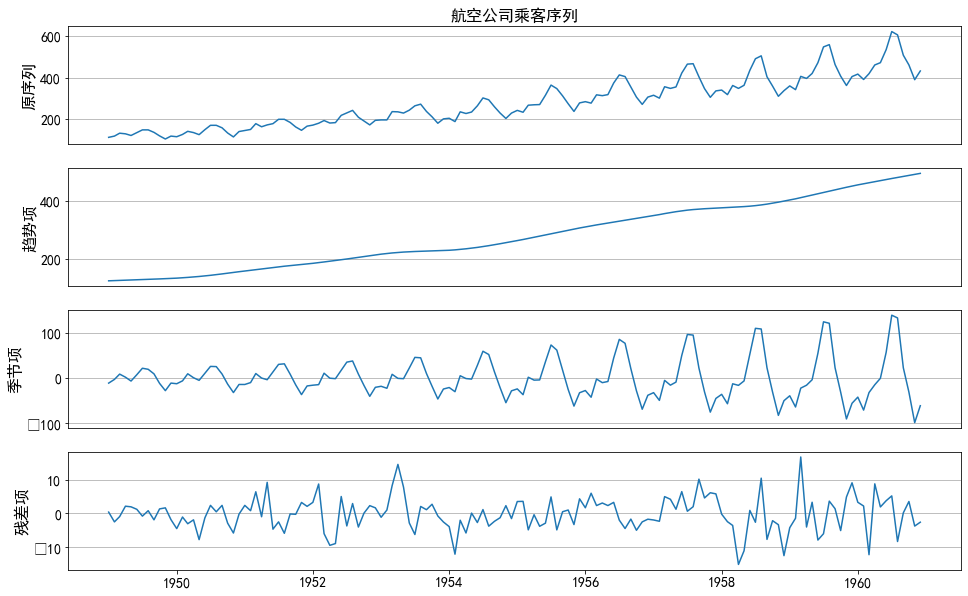

In [158]:
fig, axs = plt.subplots(4,1, figsize=(16, 10))
fs = 16
yfs = 14
axs[0].plot(ts)
axs[0].set_ylabel('原序列', fontsize=fs)
axs[0].tick_params('y', labelsize=yfs)
axs[0].set_xticks([])
axs[0].grid(True, axis='y')
axs[1].plot(trend)
axs[1].set_ylabel('趋势项', fontsize=fs)
axs[1].tick_params('y', labelsize=yfs)
axs[1].set_xticks([])
axs[1].grid(True, axis='y')
axs[2].plot(seasonal)
axs[2].set_ylabel('季节项', fontsize=fs)
axs[2].tick_params('y', labelsize=yfs)
axs[2].set_xticks([])
axs[2].grid(True, axis='y')
axs[3].plot(residual)
axs[3].set_ylabel('残差项', fontsize=fs)
axs[3].tick_params('y', labelsize=yfs)
axs[3].tick_params('x', labelsize=yfs)
axs[3].grid(True, axis='y')
axs[0].set_title('航空公司乘客序列', fontsize=fs)
axs
fig.savefig('airpassenger_STL.pdf', format='pdf')
plt.close()
fig

In [186]:
a = tf.convert_to_tensor(np.random.randint(0, 10,(2,3)), dtype='int32')
b = tf.convert_to_tensor(np.random.randint(0, 10,(2,3)), dtype='int32')

In [197]:
a, b

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[0, 2, 4],
        [4, 3, 9]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[5, 4, 5],
        [2, 7, 5]], dtype=int32)>)

In [198]:
np.sum(np.abs(a - b))

18

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
inputs = tf.random.normal((32, 10, 5))

In [12]:
model = layers.LSTM(32)

In [13]:
outputs = model(inputs)

In [14]:
outputs.shape

TensorShape([32, 32])